In [1]:
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt

import numpy as np
import multiprocessing

from src.CRMagTraj.solver import TrajectorySolver
from src.CRMagTraj.field import IGRFField, ConstField
from src.CRMagTraj.particle import Antiproton

jax.config.update("jax_enable_x64", True)

In [2]:
multiprocessing.cpu_count()

8

In [3]:
%matplotlib ipympl

In [4]:
antiproton = Antiproton(energy=3251319351.8354297) # energy in eV
field = IGRFField("IGRF14.shc", 2011, 4, 28, 5)
# field = ConstField(0.0, 0.0, -50e-6)  # Tesla

solver = TrajectorySolver(field, antiproton, 100.0, 10*6371.2*1000.0, 7371.2*1000, 10*6371.2*1000)
# solver = TrajectorySolver(field, antiproton, 100.0, 3000*1000.0, 7371.2*1000, 10*6371.2*1000)

Loading IGRF field data from: IGRF14.shc


In [5]:
x0 = jnp.array([7371.2*1000, 0.8896317284, -1.409113778])
v0 = jnp.array([jnp.pi - 2.5277092332, 3.1276583706])
sol = solver.run(x0, v0, coordinate_system="spherical")

0.00%
2.00%
4.00%
6.00%
8.00%
10.00%
12.00%
14.00%
16.00%
18.00%
20.00%
22.00%
24.00%
26.00%
28.00%
30.00%
32.00%
34.00%
36.00%
38.00%
40.00%
42.00%
44.00%
46.00%
48.00%
50.00%
52.00%
54.00%
56.00%
58.00%
60.00%
62.00%
64.00%
66.00%
68.00%
70.00%
72.00%
74.00%
76.00%
78.00%
80.00%
82.00%
84.00%
86.00%
88.00%
90.00%
92.00%
94.00%
96.00%
98.00%
100.00%


In [6]:
pos = sol[0:3]

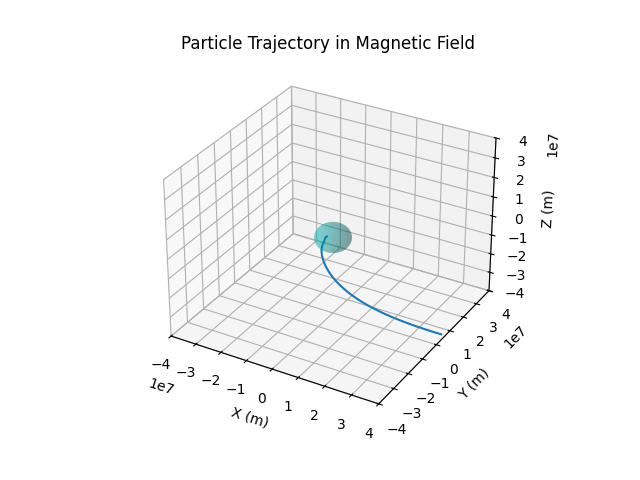

In [7]:
# plot a 3D trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(pos[0], pos[1], pos[2], rasterized=True)

# create a sphere of radius 6378 for reference
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
sphere_x = 6378000 * np.outer(np.cos(u), np.sin(v))
sphere_y = 6378000 * np.outer(np.sin(u), np.sin(v))
sphere_z = 6378000 * np.outer(np.ones(np.size(u)), np.cos(v))

ax.plot_surface(sphere_x, sphere_y, sphere_z, color='c', alpha=0.3)

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title('Particle Trajectory in Magnetic Field')
# set range for all axes
ax.set_xlim([-40000000, 40000000])
ax.set_ylim([-40000000, 40000000])
ax.set_zlim([-40000000, 40000000])

plt.show()

In [12]:
x0_list = jnp.array([
    [7371.2*1000, 0.8896317284, -1.409113778],
    [7371.2*1000, 0.8896317284 + 0.01, -1.409113778],
    [7371.2*1000, 0.8896317284 - 0.01, -1.409113778],
    [7371.2*1000, 0.8896317284, -1.409113778 + 0.01],
    [7371.2*1000, 0.8896317284, -1.409113778 - 0.01],
])
v0_list = jnp.array([
    [jnp.pi - 2.5277092332, 3.1276583706],
    [jnp.pi - 2.5277092332, 3.1276583706],
    [jnp.pi - 2.5277092332, 3.1276583706],
    [jnp.pi - 2.5277092332, 3.1276583706],
    [jnp.pi - 2.5277092332, 3.1276583706],
])
sols = solver.run_batch(x0_list, v0_list, coordinate_system="spherical")

0.00%
100.00%


NoneType

In [8]:
jacobian = solver.run_jacobian(x0, v0, coordinate_system="spherical")


In [9]:
jacobian.shape

(6, 1, 6)

In [10]:
jacobian

Array([[[ 4.18378805e+00,  1.05572624e-02,  2.93357967e+00,
          4.11441904e-02, -2.38714419e-01,  1.73130127e-02]],

       [[ 1.38962975e+01, -8.23482602e+00, -5.72522989e+01,
         -1.06065540e-03,  2.33275013e-01,  1.90265628e-02]],

       [[ 2.44338823e+00, -4.21086584e-01, -1.50508975e+00,
         -8.59613411e-03,  7.30649961e-02, -1.36448013e-02]],

       [[-2.30640475e+01,  5.83744845e+00,  9.00195445e+01,
          2.23889880e-01, -1.46897479e+00,  4.53956323e-02]],

       [[ 7.57523625e+01, -5.64461783e+01, -3.71638665e+02,
         -3.98617092e-02,  1.72144536e+00,  7.49265812e-02]],

       [[ 1.80245994e+01, -4.43410378e+01, -1.51433009e+02,
          4.62518537e-02,  8.76301959e-01, -4.37149894e-03]]],      dtype=float64)

In [11]:
jnp.reshape(jacobian, (6, 6))
jnp.linalg.det(jnp.reshape(jacobian, (6, 6)))

Array(1., dtype=float64)